Cleaned Columns:
 ['state/ut', 'year', '0_3_hrs_night', '3_6_hrs_night', '6_9_hrs_day', '9_12_hrs_day', '12_15_hrs_day', '15_18_hrs_day', '18_21_hrs_night', '21_24_hrs_night', 'total']

Shape of dataset: (490, 11)

Missing values:
 state/ut           0
year               0
0_3_hrs_night      0
3_6_hrs_night      0
6_9_hrs_day        0
9_12_hrs_day       0
12_15_hrs_day      0
15_18_hrs_day      0
18_21_hrs_night    0
21_24_hrs_night    0
total              0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_2780\2961588916.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='total', data=df, ci=None, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_2780\2961588916.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='total', data=df, ci=None, palette='Blues_d')


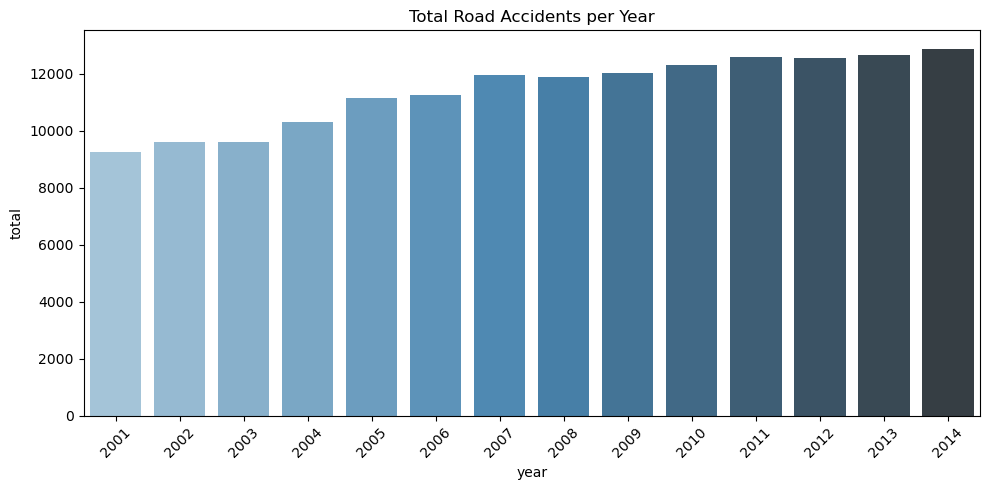

C:\Users\USER\AppData\Local\Temp\ipykernel_2780\2961588916.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Reds')


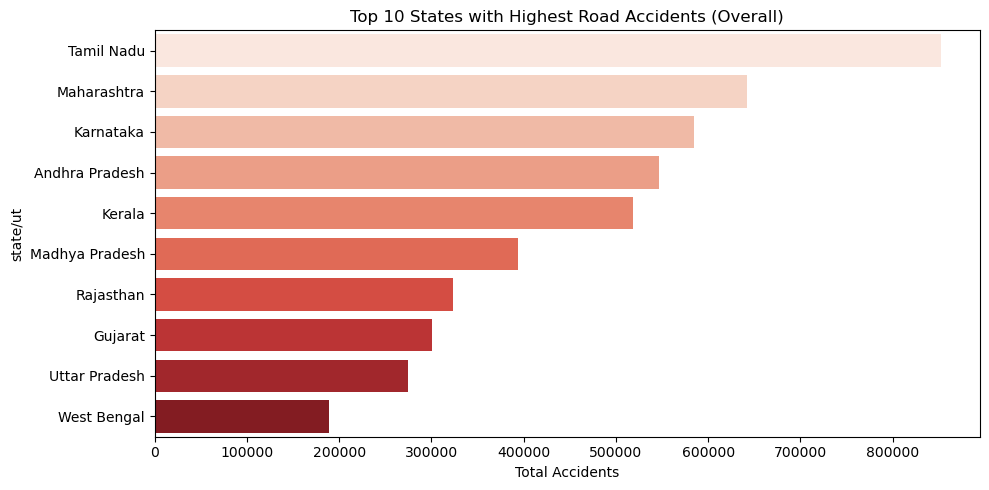

C:\Users\USER\AppData\Local\Temp\ipykernel_2780\2961588916.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_totals.index, y=time_totals.values, palette='viridis')


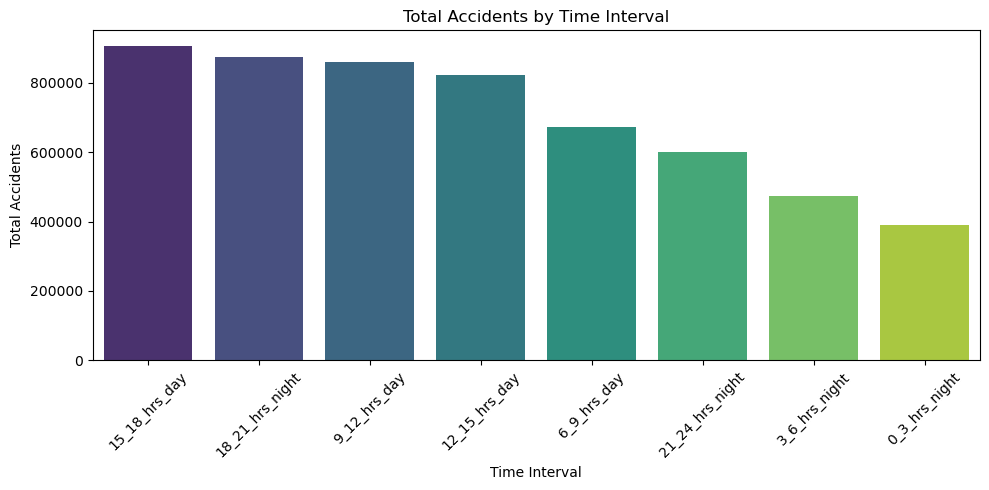

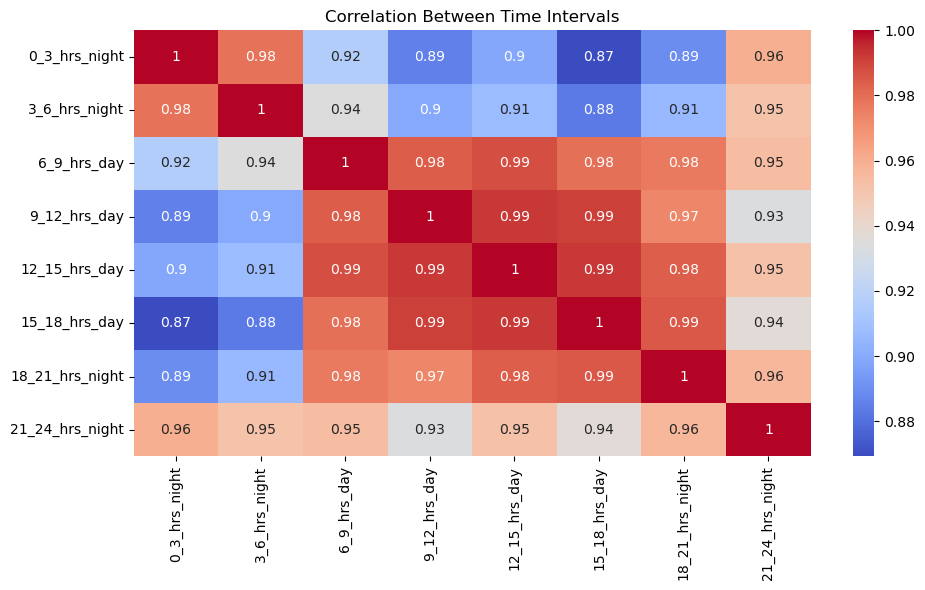

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\only_road_accidents_data3.csv")

# Clean the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace(r'[().]', '', regex=True)

# View cleaned column names
print("Cleaned Columns:\n", df.columns.tolist())

# Basic info
print("\nShape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Total accidents per year
plt.figure(figsize=(10, 5))
sns.barplot(x='year', y='total', data=df, ci=None, palette='Blues_d')
plt.title('Total Road Accidents per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total accidents per state (top 10)
top_states = df.groupby('state/ut')['total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.values, y=top_states.index, palette='Reds')
plt.title('Top 10 States with Highest Road Accidents (Overall)')
plt.xlabel('Total Accidents')
plt.tight_layout()
plt.show()

# Time-wise distribution: Sum accidents by time intervals
time_columns = [
    '0_3_hrs_night', '3_6_hrs_night', '6_9_hrs_day', '9_12_hrs_day',
    '12_15_hrs_day', '15_18_hrs_day', '18_21_hrs_night', '21_24_hrs_night'
]

time_totals = df[time_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=time_totals.index, y=time_totals.values, palette='viridis')
plt.title('Total Accidents by Time Interval')
plt.ylabel('Total Accidents')
plt.xlabel('Time Interval')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap: Correlation between time intervals
plt.figure(figsize=(10, 6))
sns.heatmap(df[time_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Time Intervals')
plt.tight_layout()
plt.show()
